# Pipeline Project

**by: David Felipe Bautista Bernal ;)**

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [ ]:
import pandas as pd

# Load data
try:
    df = pd.read_csv(
    'data/reviews.csv',)
except:
    df = pd.read_csv('https://github.com/BautistaDavid/Udacity-PipelinesProject/raw/refs/heads/main/data/reviews.csv')

df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1


## Preparing features (`X`) & target (`y`)

In [219]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [220]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS


### Univariate Exploration

#### Clothing ID

Number of Unique products 531


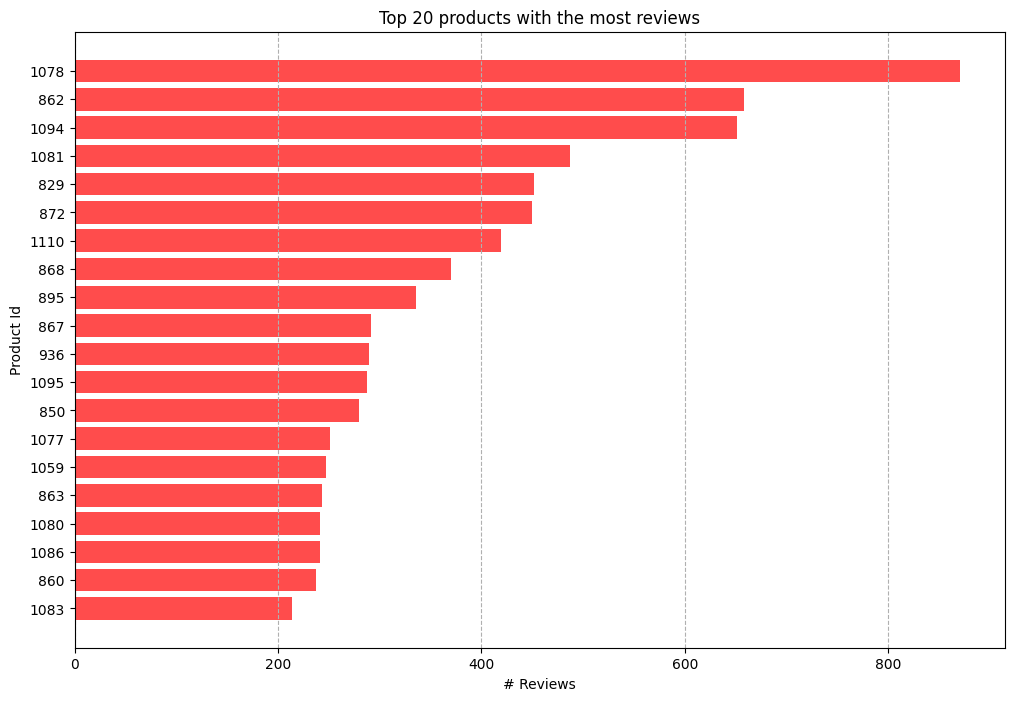

In [222]:
tab_freq_clothing_id = df['Clothing ID'].value_counts(
    ).head(20).reset_index().sort_values(by='count')
tab_freq_clothing_id['Clothing ID'] = tab_freq_clothing_id['Clothing ID'].astype('str')

fig = plt.figure(figsize=(12,8))
plt.barh(y=tab_freq_clothing_id['Clothing ID'],
         width=tab_freq_clothing_id['count'],color='red',alpha=.7)

plt.title("Top 20 products with the most reviews")
plt.ylabel("Product Id")
plt.xlabel("# Reviews")
plt.grid(axis='x',linestyle='--')


print('Number of Unique products',df['Clothing ID'].unique().shape[0])

**Conclusions:** The 20 garments with the most reviews have approximately more than 200 reviews. This means that only 3.7% of garments have information on more than 200 reviews.

#### Age

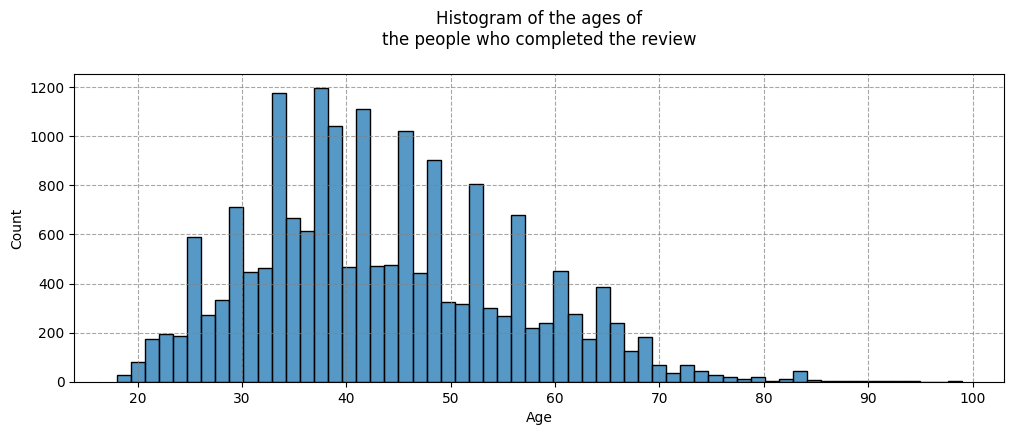

Main Stats of Age variable:


,count,mean,std,min,25%,50%,75%,max
Age,18442.0,43.383635,12.246264,18.0,34.0,41.0,52.0,99.0


In [223]:
fig = plt.figure(figsize=(12,4))
sns.histplot(data=df,x='Age')
plt.title('Histogram of the ages of\nthe people who completed the review\n')
plt.grid(linestyle='--',color='gray',alpha=0.7)
plt.show()
print('Main Stats of Age variable:')
display(df[['Age']].describe().T)

**Conclusions:** It seems that the average segment of customers who took the survey is not entirely young; in fact, this figure is 43.4 years old.

#### Positive Feedback Count

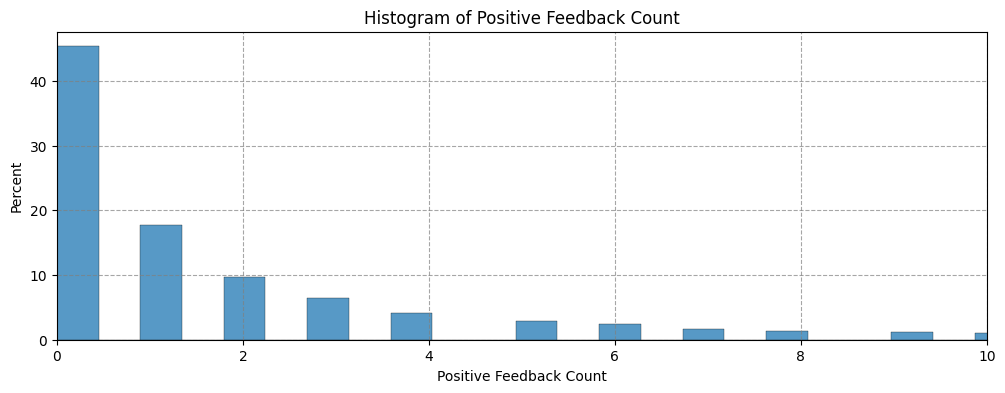

Main Stats of Positive Feedback Count:


,count,mean,std,min,25%,50%,75%,max
Positive Feedback Count,18442.0,2.697484,5.94222,0.0,0.0,1.0,3.0,122.0


In [191]:

fig = plt.figure(figsize=(12,4))
sns.histplot(data=df,x='Positive Feedback Count',stat='percent')
plt.title('Histogram of Positive Feedback Count')
plt.xlim(0,10)
plt.grid(linestyle='--',color='gray',alpha=0.7)
plt.show()
print('Main Stats of Positive Feedback Count:')
display(df[['Positive Feedback Count']].describe().T)

**Conclusions**: Almost half of the reviews weren't marked as positive by any other user. Actually, a small percentage of the total have a high number of positive reactions; in fact, the 10% of reviews with the most positive reactions from other users have more than 7.

#### Division Name	- Department Name - Class Name

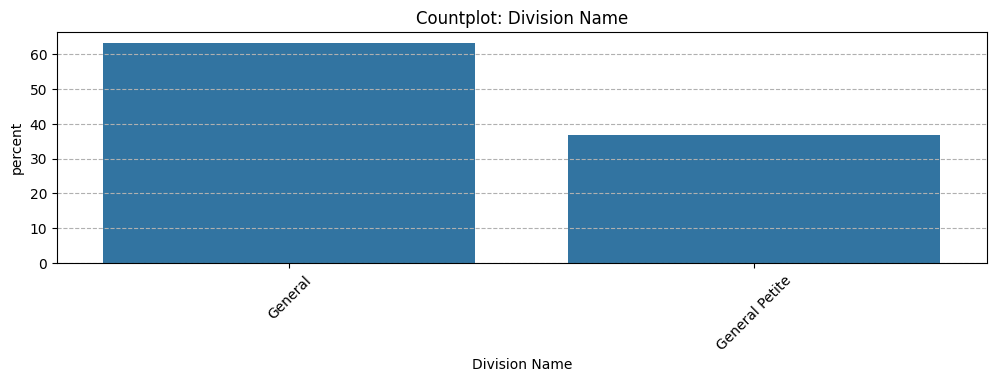

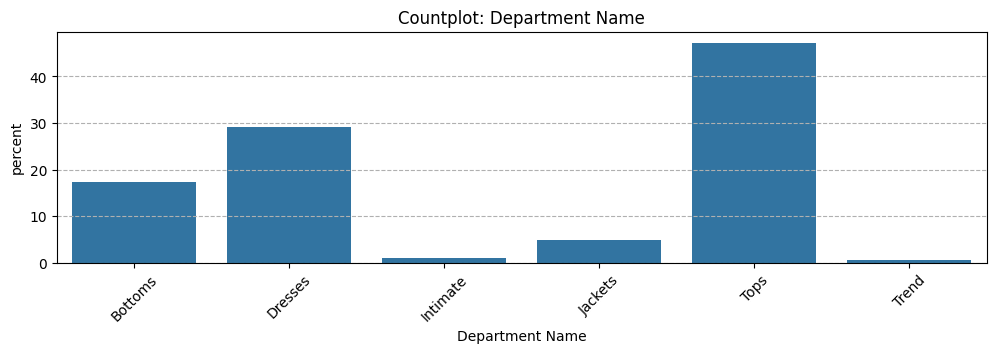

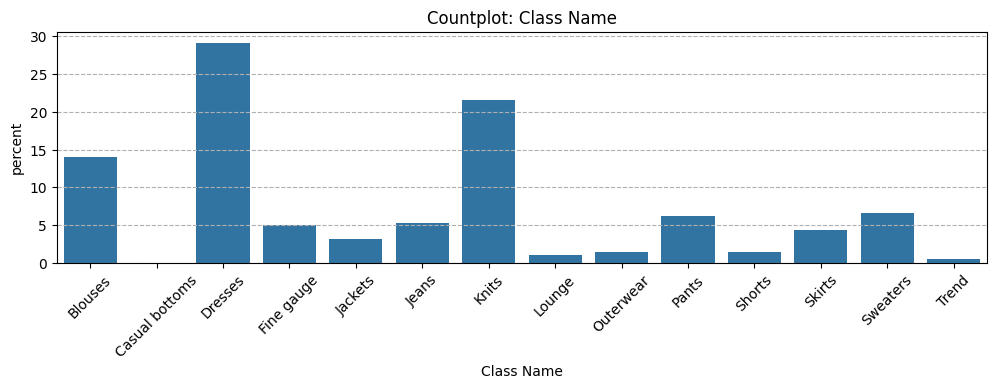

In [192]:
for i in ['Division Name', 'Department Name', 'Class Name']:
    fig = plt.figure(figsize=(12,3))
    sns.countplot(data=df.sort_values(by=i),x=i,stat='percent')
    plt.xticks(rotation=45)
    plt.grid(axis='y',linestyle='--')
    plt.title(f'Countplot: {i}')
    plt.show()

#### Title

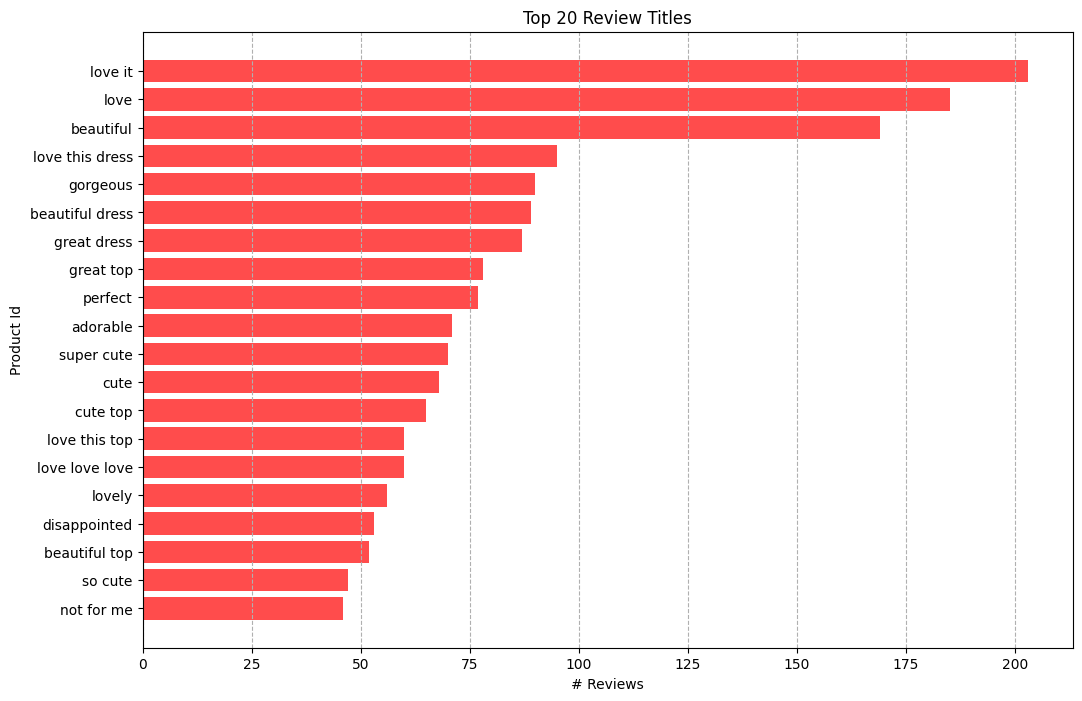

In [ ]:
def fast_clean_string_varaibles(x:str) ->str:
    """lowering and delete special characters"""
    x = re.sub(r'[^a-zA-Z0-9 ]', '',x.lower())
    return x

temp_df = df[['Title']]
temp_df.loc[:,'Title'] = temp_df['Title'].apply(fast_clean_string_varaibles)

freq_titles_top_20 = temp_df['Title'].value_counts().reset_index(    
).head(20).sort_values(by='count')

fig = plt.figure(figsize=(12,8))
plt.barh(y=freq_titles_top_20['Title'],
         width=freq_titles_top_20['count'],color='red',alpha=.7)

plt.title("Top 20 Review Titles")
plt.ylabel("Product Id")
plt.xlabel("# Reviews")
plt.grid(axis='x',linestyle='--')



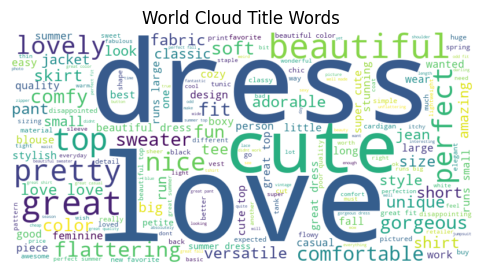

In [194]:
text = " ".join(titulo for titulo in temp_df['Title'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=800, height=400,background_color="white",
                      stopwords=stopwords,colormap="viridis").generate(text)

# Mostrarlo
plt.figure(figsize=(12,3))
plt.title('World Cloud Title Words')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Conclusions**: Looking quickly at the frequencies of the most frequently used titles in the reviews and the words used in general, we might think that a significant portion of the reviews should tend to be positive.

#### Recommended IND (Target)

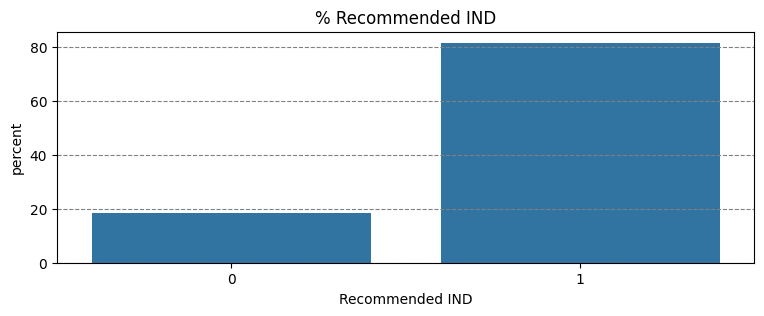

In [195]:
plt.figure(figsize=(9,3))
sns.countplot(data=df,x='Recommended IND',stat='percent')
plt.title('% Recommended IND')
plt.grid(axis='y',linestyle='--',color='gray')

**Conclusions:** There are more than 80% positive reviews. This in itself suggests a dataset imbalance problem.

### Multivariate Exploration

Text(0.5, 1.0, 'BoxPlots Age.\nCategorized by Department Name and Recommended IND\n')

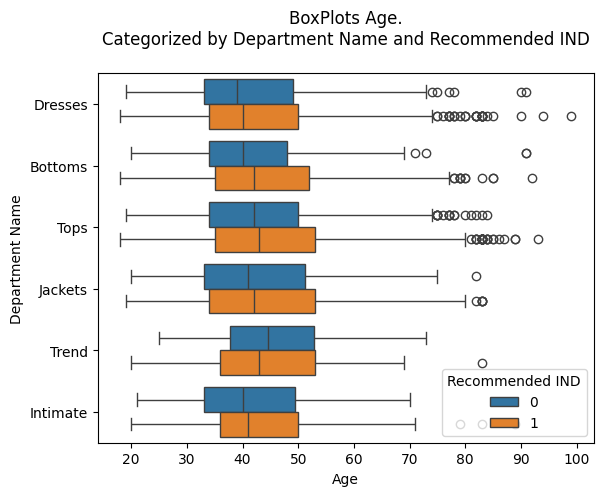

In [196]:
plt.figure()
sns.boxplot(data=df,x='Age',y='Department Name',hue='Recommended IND')
plt.title('BoxPlots Age.\nCategorized by Department Name and Recommended IND\n')

**Conclusions:** las distribuciones de las edades parecen no variar mucho sujetas al departamento de la prenda reseñada y a la intención de la reseña. 

## Building Pipeline

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import spacy
from sklearn.compose import ColumnTransformer


nlp = spacy.load('en_core_web_sm')
text_features = ["Title", "Review Text"]
num_features = ["Age","Positive Feedback Count"]
cat_features = ["Class Name"]


### Numerical Features Pipeline

In [198]:
# We don't need a imputer because there's no missing values in either of sets.
num_pipeline = Pipeline([
    (
        'scaler',
        StandardScaler(),
    ),
])

num_pipeline

,steps,"[('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


**Conclusions:** No imputation step is required since the dataset contains no missing values. The numerical pipeline therefore only includes a StandardScaler, which normalizes all numerical features to zero mean and unit variance. This ensures consistency across features and improves the performance of algorithms that are sensitive  to differences in scale.

### Categorical Feature Pipeline

In [199]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        )
    )
])

cat_pipeline

,steps,"[('ordinal_encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'use_encoded_value'
,unknown_value,-1
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


**Conclusions:**  The categorical pipeline applies an OrdinalEncoder to transform categorical values into  numerical representations. The parameter `handle_unknown='use_encoded_value'` with `unknown_value=-1` ensures that previously unseen categories during inference are handled gracefully, avoiding errors. For training, only the variable `class_name` is included, since exploratory analysis showed that it carries similar information to the other categorical variables. This suggests that the remaining categorical features may not add significant value to the model and could even introduce redundancy.


### Text Feature Pipeline

In [ ]:

class SpacyLemmatizer_and_lowering(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized = [
            ' '.join(
                token.lemma_.lower() 
                for token in doc
                if not token.is_stop and token.is_alpha  
            )
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer_and_lowering(nlp=nlp),
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
])
tfidf_pipeline 

**Conclusions:** This pipeline handles text preprocessing before feeding it into the model. First, a reshaping step ensures that the input is in the correct format. Then, a custom transformer (SpacyLemmatizer_and_lowering) is applied: it lemmatizes words, converts them to lowercase, and removes both stopwords and non-alphabetical tokens, which helps reduce noise in the text data. Finally, the TfidfVectorizer converts the cleaned text into a numerical representation based on term frequency–inverse document frequency (TF-IDF), while also removing common English stopwords. This process ensures that the textual information is normalized and represented in a way that captures semantic meaning, making it more suitable for machine learning algorithms.


### Combine Pipelines

In [202]:

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('tfidf_title', tfidf_pipeline, "Title"),
        ('tfidf_review', tfidf_pipeline, "Review Text"),
])
feature_engineering

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


**Conclussions:** The ColumnTransformer brings together all feature preprocessing steps into a single pipeline. 

- Numerical features are scaled using the numeric pipeline.  
- Categorical features are encoded through the categorical pipeline (with OrdinalEncoder).  
- Textual features are processed with the TF-IDF pipeline, separately for the "Title" and "Review Text" fields.  

This unified feature engineering approach ensures that all data types (numeric, categorical, and text) are consistently transformed and ready for modeling within a single workflow.


## Training Pipeline

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


In [212]:
model_pipeline = make_pipeline(
    feature_engineering,
    SVC(random_state=777),
)

model_pipeline.fit(X_train.drop(columns=["Division Name", "Department Name"]), y_train)

,steps,"[('columntransformer', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


**Conclusions:** The final modeling pipeline integrates the complete feature engineering process with a Support Vector Classifier (SVC). By using `make_pipeline`, preprocessing steps (scaling, encoding, and TF-IDF transformations) and model training are chained together into a single, reproducible workflow. 

During training, the features "Division Name" and "Department Name" are dropped, as they were found to provide limited predictive value or overlap with information already captured by other variables. This streamlined design ensures that the model is both efficient and less prone to redundancy in its feature space.


In [ ]:


y_pred_forest_pipeline = model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

Accuracy: 0.8411924119241192


**Conclusions:** The model achieves an accuracy of 0.84 on the test set. While this may seem like strong performance at first glance, it is important to note that the dataset is highly imbalanced, meaning accuracy alone may not be a reliable indicator of model effectiveness. For this reason, a confusion matrix will be explored next to provide a clearer view of how well the model distinguishes between classes, particularly the minority class.


In [ ]:
cm = confusion_matrix(y_test, y_pred_forest_pipeline)

print("Matriz de confusión:")
print(cm)

# Reporte con precisión, recall, f1-score
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_forest_pipeline))

Matriz de confusión:
[[  42  285]
 [   8 1510]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.13      0.22       327
           1       0.84      0.99      0.91      1518

    accuracy                           0.84      1845
   macro avg       0.84      0.56      0.57      1845
weighted avg       0.84      0.84      0.79      1845



**Conslusions:** # Technical summary: The confusion matrix and classification report confirm that, despite achieving an overall accuracy of 0.84, the model struggles significantly with the minority class (class 0). Specifically, recall for class 0 is only 0.13, indicating that the model fails to correctly identify most of these cases, while performance on the majority class (class 1) is very strong with recall close to 0.99. 

This imbalance highlights that the current pipeline is biased towards the majority class and that accuracy alone is not an adequate performance metric in this context. To address this, the next step will be to implement model tuning techniques (e.g., adjusting class weights, hyperparameter optimization, or resampling strategies) in order to improve  minority class detection and achieve a more balanced performance across both classes.


## Fine-Tuning Pipeline

In [213]:
from sklearn.model_selection import RandomizedSearchCV

# Distribuciones de hiperparámetros para SVC
my_distributions = dict(
    svc__C=[0.1, 1, 10, 50, 100],
    svc__kernel=['linear', 'rbf'],
    svc__gamma=['scale', 'auto', 0.01, 0.001],
    svc__class_weight=[None, 'balanced']  # importante para desbalanceo
)

# RandomizedSearchCV
param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=my_distributions,
    n_iter=10,     # probar 10 combinaciones aleatorias
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,     # paralelización
    refit=True,    # volver a entrenar con los mejores parámetros
    verbose=3,     # ver progreso
    random_state=27,
    scoring="f1_macro"   # mejor que accuracy si hay desbalance
)

# Entrenamiento
param_search.fit(X_train, y_train)

# Mejores parámetros
print("Best Params:", param_search.best_params_)
print("Best Score:", param_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params: {'svc__kernel': 'linear', 'svc__gamma': 0.001, 'svc__class_weight': None, 'svc__C': 1}
Best Score: 0.827964425126187


**Conclusions:** A RandomizedSearchCV was performed to optimize the hyperparameters of the SVC model, using 5-fold cross-validation and f1_macro as the scoring metric to account for class imbalance.  The search explored different values of C, kernel types, gamma settings, and class weight options.  

The best configuration found was: 
   - kernel = 'linear'  
   - C = 1  
   - gamma = 0.001  
   - class_weight = None  
achieving a cross-validated f1_macro score of approximately 0.828. 

Interestingly, the best results were obtained with `class_weight=None`, meaning the model performed better without applying the built-in class balancing. This highlights that, in this case, the automatic balancing mechanism may not align well with the data distribution, and alternative strategies (such as resampling methods or customized class weights) could be more effective for improving minority class performance.

In [214]:
model_best = param_search.best_estimator_
model_best

,steps,"[('columntransformer', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [215]:
y_pred_forest_pipeline = model_best.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

Accuracy: 0.9040650406504065


In [ ]:

cm = confusion_matrix(y_test, y_pred_forest_pipeline)

print("Matriz de confusión:")
print(cm)

# Reporte con precisión, recall, f1-score
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_forest_pipeline))

Matriz de confusión:
[[ 226  101]
 [  76 1442]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       327
           1       0.93      0.95      0.94      1518

    accuracy                           0.90      1845
   macro avg       0.84      0.82      0.83      1845
weighted avg       0.90      0.90      0.90      1845



**Conclusions:** On the final test set, the model achieved an accuracy of 0.90, which is a strong overall result. However, the confusion matrix and classification report reveal that performance is still uneven across classes. The model maintains very high recall for the majority class, but struggles more with the minority class, reflecting the impact of class imbalance. While improvements were made through hyperparameter tuning, further work on balancing techniques could help achieve a more equitable performance across both classes.


**Final Conclusions.**

In the end, the model reached a solid 0.90 accuracy on the test set, showing that the pipeline works well. Still, the results also made clear that the model performs much better on the majority class than on the minority one, so there’s room to improve balance. Next steps could include trying resampling techniques or other balancing methods to make the predictions fairer. Overall, this project proved how a complete ML pipeline can be built and tuned effectively, while also showing the importance of looking beyond accuracy when evaluating models.